# Clustering Mega-Script

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder

In [2]:
df = pd.read_csv("Data.csv")
df['Genre'] = LabelEncoder().fit_transform(df['Genre'])
df

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,1,19,15,39
1,2,1,21,15,81
2,3,0,20,16,6
3,4,0,23,16,77
4,5,0,31,17,40
...,...,...,...,...,...
195,196,0,35,120,79
196,197,0,45,126,28
197,198,1,32,126,74
198,199,1,32,137,18


In [4]:
X = df.iloc[:, [3, 4]].values

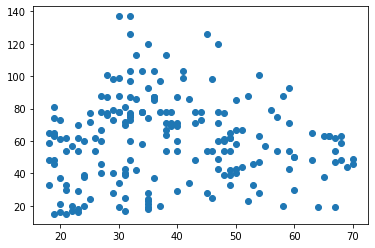

In [5]:
plt.scatter(df.iloc[:, 2].values, df.iloc[:, 3].values)
plt.show()

## K-Means Clustering

### Elbow Method

In [6]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)
wcss

[269981.28000000014,
 181363.59595959607,
 106348.37306211119,
 73679.78903948837,
 44448.45544793369,
 37265.86520484345,
 30241.34361793659,
 25336.94686147186,
 21850.16528258562,
 19634.554629349972]

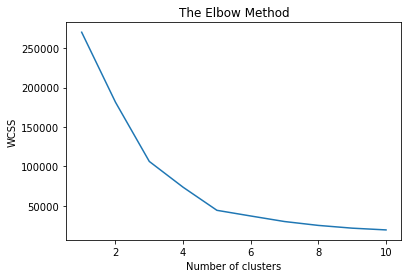

In [7]:
plt.plot(range(1, 11), wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

### Train K-Means model

In [8]:
kmeans = KMeans(n_clusters = 5, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

In [9]:
print(y_kmeans)

[3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3 0 3
 0 3 0 3 0 3 1 3 0 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 4 2 1 2 4 2 4 2 1 2 4 2 4 2 4 2 4 2 1 2 4 2 4 2
 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2 4
 2 4 2 4 2 4 2 4 2 4 2 4 2 4 2]


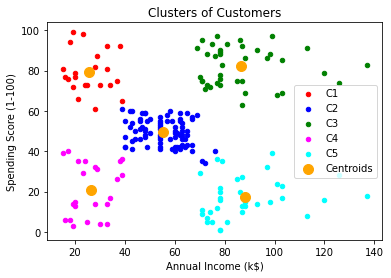

In [10]:
plt.scatter(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], s = 20, c = 'red', label = 'C1')
plt.scatter(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], s = 20, c = 'blue', label = 'C2')
plt.scatter(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], s = 20, c = 'green', label = 'C3')
plt.scatter(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], s = 20, c = 'magenta', label = 'C4')
plt.scatter(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], s = 20, c = 'cyan', label = 'C5')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s = 100, c = 'orange', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

## Hierarchical Clustering

### Dendrogram

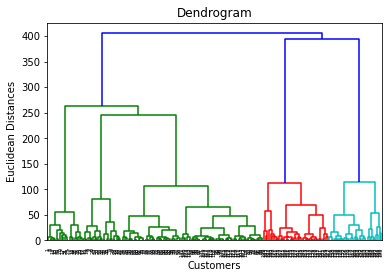

In [11]:
import scipy.cluster.hierarchy as sch
d = sch.dendrogram(sch.linkage(X, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

### Train Hierarchical Model with 3 clusters

In [12]:
from sklearn.cluster import AgglomerativeClustering
hc3 = AgglomerativeClustering(n_clusters = 3, affinity = 'euclidean', linkage = 'ward')
y_hc3 = hc3.fit_predict(X)

In [13]:
print(y_hc3)

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 2 0 2 0 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 0 2 1 2 0 2
 1 2 1 2 1 2 1 2 1 2 1 2 0 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2 1
 2 1 2 1 2 1 2 1 2 1 2 1 2 1 2]


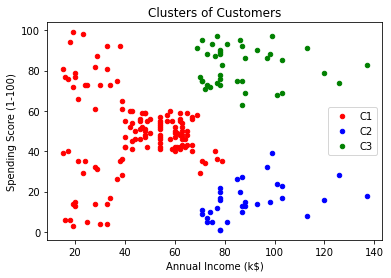

In [14]:
plt.scatter(X[y_hc3 == 0, 0], X[y_hc3 == 0, 1], s = 20, c = 'red', label = 'C1')
plt.scatter(X[y_hc3 == 1, 0], X[y_hc3 == 1, 1], s = 20, c = 'blue', label = 'C2')
plt.scatter(X[y_hc3 == 2, 0], X[y_hc3 == 2, 1], s = 20, c = 'green', label = 'C3')
# plt.scatter(hc.cluster_centers_[:, 0], hc.cluster_centers_[:, 1], s = 100, c = 'orange', label = 'Centroids')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

### Train Hierarchical Model with 5 clusters

In [15]:
from sklearn.cluster import AgglomerativeClustering
hc5 = AgglomerativeClustering(n_clusters = 5, affinity = 'euclidean', linkage = 'ward')
y_hc5 = hc5.fit_predict(X)

In [16]:
print(y_hc5)

[4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4 3 4
 3 4 3 4 3 4 1 4 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 1 1 1 2 1 2 1 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 1 2 0 2 1 2
 0 2 0 2 0 2 0 2 0 2 0 2 1 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2 0
 2 0 2 0 2 0 2 0 2 0 2 0 2 0 2]


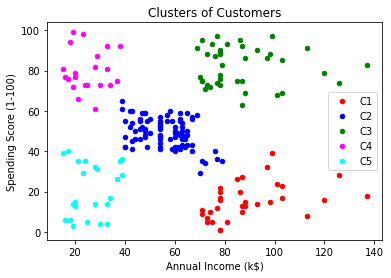

In [17]:
plt.scatter(X[y_hc5 == 0, 0], X[y_hc5 == 0, 1], s = 20, c = 'red', label = 'C1')
plt.scatter(X[y_hc5 == 1, 0], X[y_hc5 == 1, 1], s = 20, c = 'blue', label = 'C2')
plt.scatter(X[y_hc5 == 2, 0], X[y_hc5 == 2, 1], s = 20, c = 'green', label = 'C3')
plt.scatter(X[y_hc5 == 3, 0], X[y_hc5 == 3, 1], s = 20, c = 'magenta', label = 'C4')
plt.scatter(X[y_hc5 == 4, 0], X[y_hc5 == 4, 1], s = 20, c = 'cyan', label = 'C5')
plt.title('Clusters of Customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()